In [1]:
from autoencoder import *

In [2]:
model, _ = model_loader("autoencoder_2025-05-07_17-02-19_epoch_3.pt")
model = model.to(DEVICE)
model.eval()

ClagnoscoAutoencoder(
  (encoder): ClagnoscoEncoder(
    (conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
      (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01, inplace=True)
      (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_slope=0.01, inplace=True)
      (9): Conv2d(256, 2048, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (10): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (pool)

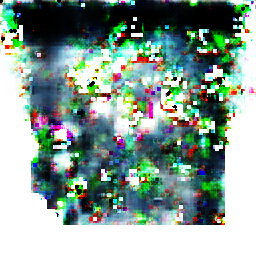

In [3]:
img = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/2-Finnic-branch.png/190px-2-Finnic-branch.png"
img = r"C:\!project-dataset\images\000d10f3c1c08fc3bf7a68322cab7b7f.jpg"
img = r"C:\!project-dataset\images\00a50fad781d7e2edc57b3780be70e7f.jpg"

latent_vec, embedding_vec, restored_img = run_image_through_autoencoder(model, img)

restored_img

In [4]:
latent_vec, embedding_vec

(tensor([ 1.1659e+00,  1.0171e+00,  3.0129e+00, -2.3702e+00, -1.8929e+00,
         -6.7141e-01, -4.7950e-01, -1.6488e+00, -7.2353e-01, -4.4908e-01,
         -1.3317e+00,  2.1859e+00, -4.9042e-01,  6.6658e-01, -1.1997e+00,
         -1.8093e+00,  4.0158e-01,  3.1328e-01,  2.2332e-01, -5.8761e-01,
         -8.6074e-01, -1.9784e+00,  6.5995e-01,  1.4403e+00, -2.8988e+00,
         -1.4192e+00,  8.5551e-01, -4.6281e-01,  3.6138e+00,  1.9488e-01,
          1.1439e+00, -1.6351e+00,  2.1974e+00, -9.4011e-01,  2.2773e+00,
         -1.1214e+00, -2.0773e-01,  5.7206e-01, -2.8991e+00, -6.9608e-01,
         -5.0673e-01,  1.5275e-01,  6.9267e-02, -8.2388e-01,  6.5282e-01,
         -4.6539e-01,  1.2603e+00, -8.9442e-01,  1.8525e+00, -7.4355e-01,
          1.4097e+00,  3.5138e+00, -2.7176e+00, -1.1242e+00,  4.6428e-01,
         -3.2806e+00,  1.2875e+00,  1.3194e+00, -4.2146e-01, -6.8622e-01,
          1.1607e+00, -8.3976e-01,  4.4703e-01, -2.0873e+00, -5.4726e-01,
          2.6193e+00,  5.7166e-01,  4.